In [1]:
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_directory = '/content/drive/MyDrive/ML Assignment Data/Assignment  3/Data'

In [5]:
data = image_dataset_from_directory(
    dataset_directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=15,
    validation_split = None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1668 files belonging to 4 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

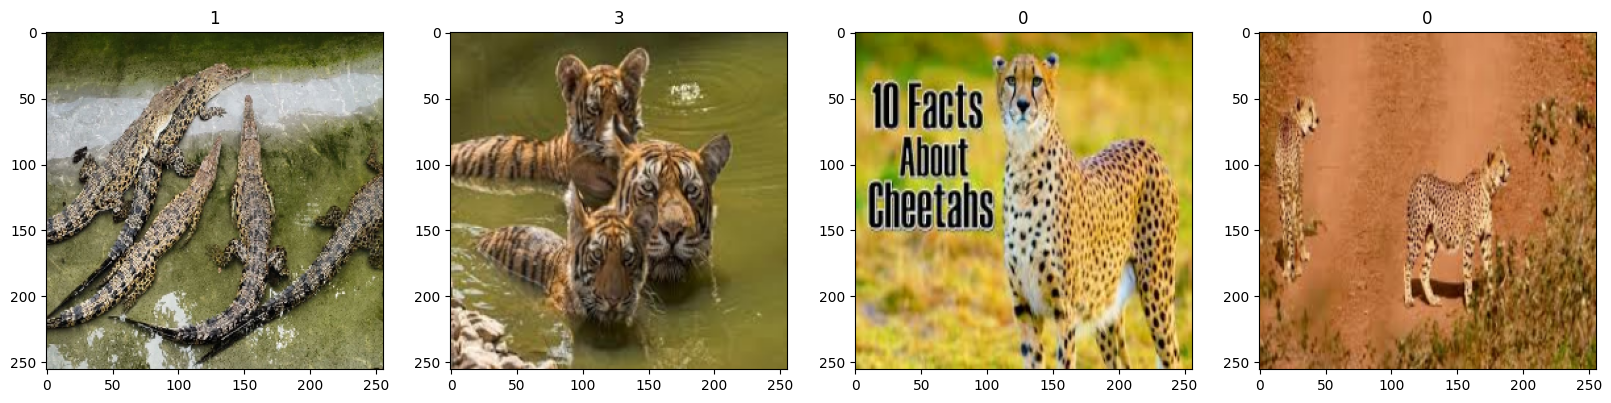

In [8]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

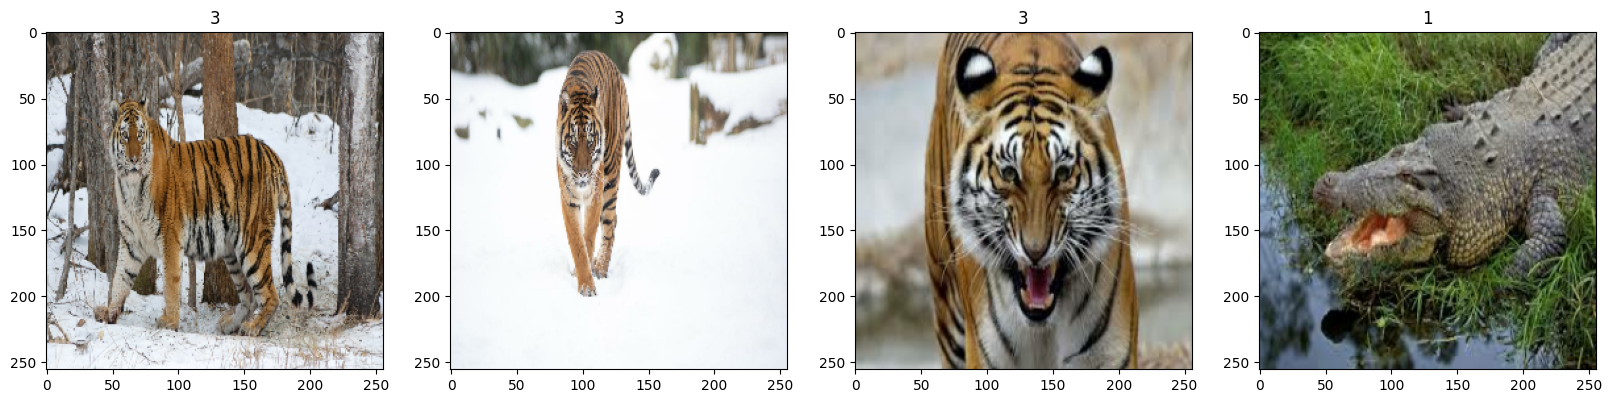

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

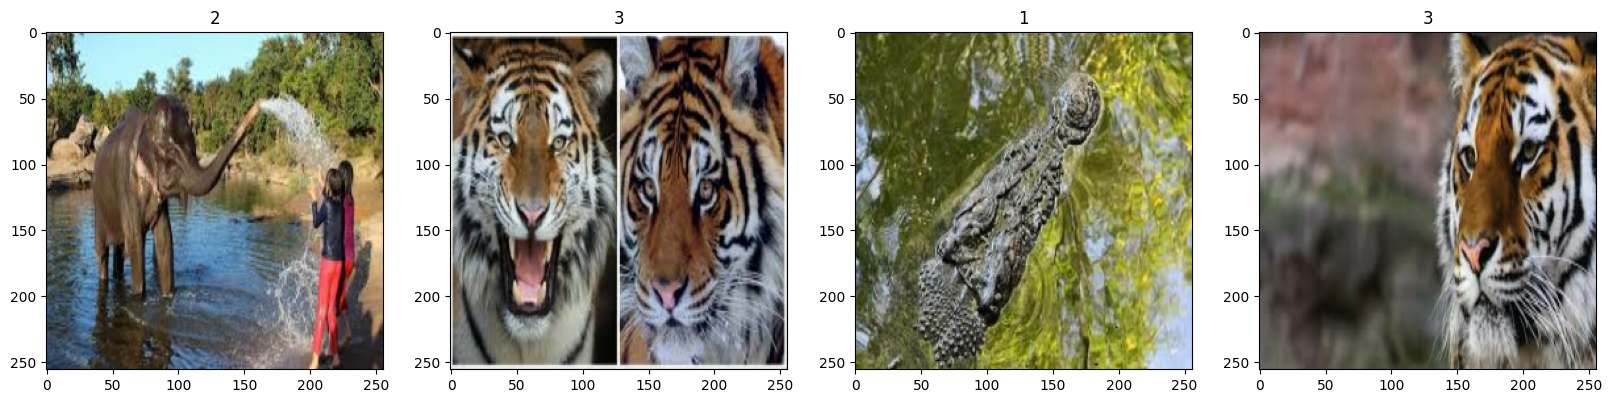

In [12]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [13]:
#Function to Normalize the Data
def normalize(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


In [14]:
#Normalizing the Data
data = data.map(normalize)

In [15]:
#Creating the Train Data and Test Data
data_cardinality = data.cardinality().numpy()
train_size = int(0.95*data_cardinality)
test_size = int(0.05*data_cardinality)

train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)

In [27]:
#Defining the Neural Network Architecture
from tensorflow.keras import models, layers

number_of_classes = 4

model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.25),

    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.25),

    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.5),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(number_of_classes, activation='softmax')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 127, 127, 128)     0         
                                                                 
 flatten_3 (Flatten)         (None, 2064512)           0         
                                                                 
 dense_11 (Dense)            (None, 64)                132128832 
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                      

In [28]:
#Compiling the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
history = model.fit(train_data,epochs = 15, validation_data = test_data)

Epoch 1/15
50/50 [==============================] - 65s 1s/step - loss: 6.9882 - accuracy: 0.2694 - val_loss: 1.3455 - val_accuracy: 0.4062
Epoch 2/15
50/50 [==============================] - 65s 1s/step - loss: 1.3571 - accuracy: 0.3225 - val_loss: 1.3290 - val_accuracy: 0.4688
Epoch 3/15
50/50 [==============================] - 65s 1s/step - loss: 1.3172 - accuracy: 0.3844 - val_loss: 1.2827 - val_accuracy: 0.4688
Epoch 4/15
50/50 [==============================] - 65s 1s/step - loss: 1.2588 - accuracy: 0.4550 - val_loss: 1.0662 - val_accuracy: 0.7500
Epoch 5/15
50/50 [==============================] - 65s 1s/step - loss: 1.1789 - accuracy: 0.5138 - val_loss: 0.9893 - val_accuracy: 0.7031
Epoch 6/15
50/50 [==============================] - 65s 1s/step - loss: 1.1280 - accuracy: 0.5544 - val_loss: 0.9287 - val_accuracy: 0.7500
Epoch 7/15
50/50 [==============================] - 66s 1s/step - loss: 1.0176 - accuracy: 0.6150 - val_loss: 0.7849 - val_accuracy: 0.8594
Epoch 8/15
50/50 [==

In [33]:
loss,accuracy = model.evaluate(train_data)

50/50 [==============================] - 14s 256ms/step - loss: 0.2850 - accuracy: 0.9700


In [34]:
print(f"Accuracy --> {accuracy}   Loss --> {loss}")

Accuracy --> 0.9700000286102295   Loss --> 0.2849920094013214


In [36]:
loss_test,accuracy_test = model.evaluate(test_data)

2/2 [==============================] - 4s 255ms/step - loss: 0.3657 - accuracy: 0.9688


In [37]:
print(f"Accuracy --> {accuracy_test}   Loss --> {loss_test}")

Accuracy --> 0.96875   Loss --> 0.36566299200057983
